## Linguistic Case Study

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import boxplot
import itertools
import glob
from scipy import stats
import g4l

In [2]:
class SmallestMaximizerCriterion():
    A = [0, 1, 2, 3, 4]
    champion_trees = []
    best_tree = None
    
    def __init__(self, sample_file, max_depth=4):
        self.sample = g4l.data.Sample(sample_file, self.A)
        self.initial_tree = g4l.tree.ContextTree(self.sample, max_depth=max_depth)
    
    def run(self, min_c=0.1, max_c=400, epsilon=0.01):
        smc = g4l.estimators.SMC(self.initial_tree)
        self.champion_trees = smc.execute(min_c, max_c, epsilon)
        return self

    def save(self, dump_folder):
        for i, ch in enumerate(self.champion_trees):
            ch.save(dump_folder, 'champion.%s' % i)
        print('saved!')

    @classmethod
    def load(self, sample_file, dump_folder, max_depth=4):
        smc = SmallestMaximizerCriterion(sample_file, max_depth=max_depth)
        smc.champion_trees = []
        amnt_trees = len(glob.glob('./g4l/fixtures/pt/bp' + '/champion*.df.pkl'))
        for i in range(amnt_trees):
            ch = g4l.tree.ContextTree.load(dump_folder, 'champion.%s' % i)
            smc.champion_trees.append(ch)
        return smc
        

In [74]:
# Generating trees for Brazilian Portuguese (BP)
# NOTE: this block only needs to be executed once; It can be loaded further in the box below
BP = SmallestMaximizerCriterion('./g4l/fixtures/folha.txt').run()
BP.save('./g4l/fixtures/pt/bp')

Start: 2020-07-09 02:07:52.841105
** c= 200.05 		==> 0 1 2 3 4
** c= 100.075 		==> 00 1 10 2 20 3 30 4
** c= 50.0875 		==> 00 1 10 2 20 3 30 4
** c= 25.0938 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 12.5969 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 6.3484 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 3.2242 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 1.6621 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 0.8811 		==> 000 001 010 100 2 20 200 201 21 210 3 30 300 4
** c= 0.4905 		==> 0000 001 0010 100 2 20 200 2000 201 2010 21 210 3 30 300 4
** c= 0.2953 		==> 0000 001 0010 0210 030 100 1210 130 2 20 200 2000 201 2010 21 3 300 3210 330 4 4210 430
** c= 0.1976 		==> 0000 0001 0010 0130 0210 03 030 100 1210 13 2 20 200 2000 2001 201 2010 21 2130 300 3210 33 330 4 4210 43 430
** c= 0.1488 		==> 0000 0001 0010 002 0102 012 0130 0201 0210 03 030 100 1201 1210 13 20 200 2000 2001 2010 21 2102 212 2130 300 302 32 3201 3210 33 330 4 42 4201 4210 43 430
** c= 0.1244 		==> 0000 0001 0010 002 00

** c= 50.1786 		==> 00 1 10 2 20 3 30 4
** c= 25.1913 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 12.6977 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 6.4509 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 3.3275 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 1.7658 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 0.985 		==> 000 001 010 100 2 20 200 201 21 210 3 30 300 4
** c= 0.5945 		==> 000 001 0010 100 2 20 200 201 2010 21 210 3 30 300 4
** c= 0.3993 		==> 0000 001 0010 100 2 20 200 2000 201 2010 21 210 3 30 300 4
** c= 0.3017 		==> 0000 001 0010 0210 100 1210 2 20 200 2000 201 2010 21 3 30 300 3210 4 4210
** c= 0.2529 		==> 0000 001 0010 0210 030 100 1210 130 2 20 200 2000 201 2010 21 3 300 3210 330 4 4210 430
** c= 0.2285 		==> 0000 001 0010 0210 03 030 100 1210 13 130 2 20 200 2000 201 2010 21 300 3210 33 330 4 4210 43 430
** c= 0.2163 		==> 0000 0001 0010 0210 03 030 100 1210 13 130 2 20 200 2000 2001 201 2010 21 300 3210 33 330 4 4210 43 430
** c= 0.2224 		==> 0000 0001 0010 0210 03 

** c= 4.1531 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 2.5946 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 1.8154 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 1.4258 		==> 000 001 10 100 2 20 200 201 21 3 30 300 4
** c= 1.6206 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 1.5232 		==> 000 001 10 100 2 20 200 201 21 3 30 300 4
** c= 1.5719 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 1.5475 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 1.5354 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 1.5293 		==> 000 001 10 100 2 20 200 201 21 3 30 300 4
** c= 200.7677 		==> 0 1 2 3 4
** c= 101.1515 		==> 00 1 10 2 20 3 30 4
** c= 51.3434 		==> 00 1 10 2 20 3 30 4
** c= 26.4394 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 38.8914 		==> 00 1 10 2 20 3 30 4
** c= 32.6654 		==> 00 1 10 2 20 3 30 4
** c= 29.5524 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 31.1089 		==> 00 1 10 2 20 3 30 4
** c= 30.3307 		==> 00 1 10 2 20 3 30 4
** c= 29.9415 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 30.1361 		==> 00

In [75]:
# Generating trees for European Portuguese (BP)
# NOTE: this block only needs to be executed once; It can be loaded further in the box below
EP = SmallestMaximizerCriterion('./g4l/fixtures/publico.txt').run()
EP.save('./g4l/fixtures/pt/ep')

Start: 2020-07-09 02:27:48.441020
** c= 200.05 		==> 0 1 2 3 4
** c= 100.075 		==> 00 1 10 2 20 3 30 4
** c= 50.0875 		==> 00 1 10 2 20 3 30 4
** c= 25.0938 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 12.5969 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 6.3484 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 3.2242 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 1.6621 		==> 000 001 10 100 2 20 200 201 21 3 30 300 4
** c= 0.8811 		==> 000 001 010 100 2 20 200 201 21 210 3 30 300 4
** c= 0.4905 		==> 000 001 010 100 2 20 200 201 21 210 3 30 300 4
** c= 0.2953 		==> 000 001 0010 100 2 20 200 201 2010 21 210 3 30 300 4
** c= 0.1976 		==> 0000 0001 0010 013 02 0210 03 030 100 12 1210 130 20 200 2000 2001 201 2010 21 213 300 32 3210 33 330 4 42 4210 43 430
** c= 0.1488 		==> 0000 0001 0010 012 013 02 0210 03 030 100 1210 130 20 200 2000 2001 201 2010 21 212 213 300 32 3210 33 330 4 42 4210 43 430
** c= 0.1244 		==> 0000 0001 0010 012 013 02 0210 03 030 100 1210 130 20 200 2000 2001 201 2010 21 21

** c= 0.2133 		==> 0000 0001 0010 02 0210 030 100 12 1210 130 20 200 2000 2001 201 2010 21 3 300 32 3210 330 4 42 4210 430
** c= 0.2194 		==> 0000 0001 0010 02 0210 030 100 12 1210 130 20 200 2000 2001 201 2010 21 3 300 32 3210 330 4 42 4210 430
** c= 200.1127 		==> 0 1 2 3 4
** c= 100.1691 		==> 00 1 10 2 20 3 30 4
** c= 50.1973 		==> 00 1 10 2 20 3 30 4
** c= 25.2114 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 12.7184 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 6.4719 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 3.3487 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 1.7871 		==> 000 1 10 100 2 20 200 3 30 300 4
** c= 1.0063 		==> 000 001 010 100 2 20 200 201 21 210 3 30 300 4
** c= 0.6159 		==> 000 001 010 100 2 20 200 201 21 210 3 30 300 4
** c= 0.4207 		==> 000 001 010 100 2 20 200 201 21 210 3 30 300 4
** c= 0.3231 		==> 000 001 0010 100 2 20 200 201 2010 21 210 3 30 300 4
** c= 0.2743 		==> 000 001 0010 030 100 130 2 20 200 201 2010 21 210 3 300 330 4 430
** c= 0.2499 		==> 0000 0

** c= 191.5692 		==> 0 1 2 3 4
** c= 179.9897 		==> 0 1 2 3 4
** c= 174.2 		==> 00 1 10 2 20 3 30 4
** c= 177.0949 		==> 00 1 10 2 20 3 30 4
** c= 178.5423 		==> 0 1 2 3 4
** c= 177.8186 		==> 0 1 2 3 4
** c= 177.4567 		==> 0 1 2 3 4
** c= 177.2758 		==> 0 1 2 3 4
** c= 177.1853 		==> 0 1 2 3 4
** c= 177.1401 		==> 0 1 2 3 4
** c= 177.1175 		==> 00 1 10 2 20 3 30 4
** c= 177.1288 		==> 0 1 2 3 4
** c= 177.1231 		==> 0 1 2 3 4
** c= 177.1203 		==> 0 1 2 3 4
** c= 177.1189 		==> 0 1 2 3 4
** c= 177.1182 		==> 00 1 10 2 20 3 30 4
End: 2020-07-09 02:46:00.304188
saved!


In [3]:
# Load previously saved trees
BP = SmallestMaximizerCriterion.load('./g4l/fixtures/folha.txt',   './g4l/fixtures/pt/bp')
EP = SmallestMaximizerCriterion.load('./g4l/fixtures/publico.txt', './g4l/fixtures/pt/ep')

In [31]:
ll_ep = [x.log_likelihood() for x in EP.champion_trees]
num_contexts_ep = [len(x.leaves()) for x in EP.champion_trees]

ll_bp = [x.log_likelihood() for x in BP.champion_trees]
num_contexts_bp = [len(x.leaves()) for x in BP.champion_trees]

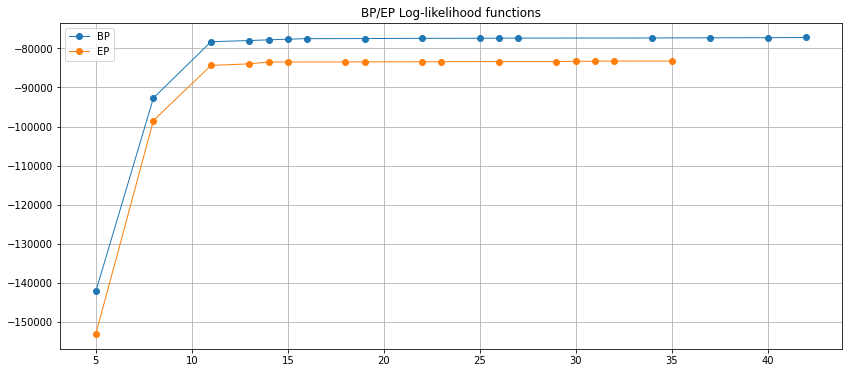

In [39]:
plt.figure(figsize=(14, 6))
plt.plot(num_contexts_bp, ll_bp, marker='o', linewidth=1, label="BP")
plt.plot(num_contexts_ep, ll_ep, marker='o', linewidth=1, label="EP")
plt.title("BP/EP Log-likelihood functions")
plt.grid()
plt.legend()
plt.show()

In [ ]:
bootstrap = Bootstrap()
amnt_new_samples = 200
sample_ratio_1 = 0.3
sample_ratio_2 = 0.9
partition_string = '4' # para o exemplo linguistico

# smaller length resamples
len_sm = int(len(source_sample.data) * sample_ratio_1)

# larger length resamples
len_lg = int(len(source_sample.data) * sample_ratio_2)